# US Baby Names 1880-2010
- __At first dowload 'national data' file from this site http://www.ssa.gov/oact/babynames/limits.html__
- __Copy yob1880.txt file__

In [17]:
import pandas as pd
cnames = ['name', 'sex', 'births']
names1880 = pd.read_csv('names/yob1880.txt', names=cnames)
names1880[:5]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


#### Concat data from 1880 to 2010 into single DataFrame
- __At first 'concat' glues the dataframe objects together row-wise by default__
- __Secondly, you have to pass 'ignore_index=True'
because we’re not interested in preserving the original row numbers returned from
read_csv__



In [43]:
years = range(1880, 2010)
columns = ['name', 'sex', 'births']
pieces = []

for year in years:
    path = 'names/yob%d.txt' %year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
    #concate everything into single DataFrame
    names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1658231,Zyquarius,M,5,2009
1658232,Zyran,M,5,2009
1658233,Zyreion,M,5,2009
1658234,Zyrian,M,5,2009


- __Now let's aggregate the data__
- __Here we are using 'index' instead of 'rows' keyword__



In [36]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc='sum')
total_births.tail()

sex,F,M
year,,
2005,1846945,1996377
2006,1900190,2054166
2007,1921491,2074249
2008,1889593,2038796
2009,1835649,1982082


- __Now let's find the top 1000 name each sex/year combination__
- __Now this is another group operation__
- __'apply' function in order to apply function to every row in given dataframe__

In [57]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
c = grouped.apply(get_top1000)
top1000

name sex  births  year
year sex                                     
1880 F   0             Mary   F    7065  1880
         1             Anna   F    2604  1880
         2             Emma   F    2003  1880
         3        Elizabeth   F    1939  1880
         4           Minnie   F    1746  1880
...                     ...  ..     ...   ...
2009 M   1644702      Stone   M     198  2009
         1644703   Fredrick   M     197  2009
         1644704   Immanuel   M     197  2009
         1644705       Nick   M     197  2009
         1644706     Trevin   M     197  2009

[259876 rows x 4 columns]

## Analyzing Naming Trends

- __Now we will analyze the data from top 1,000 data set__



In [59]:
boys = top1000[top1000.sex == 'M']
boys

name sex  births  year
year sex                                    
1880 M   942          John   M    9655  1880
         943       William   M    9532  1880
         944         James   M    5927  1880
         945       Charles   M    5348  1880
         946        George   M    5126  1880
...                    ...  ..     ...   ...
2009 M   1644702     Stone   M     198  2009
         1644703  Fredrick   M     197  2009
         1644704  Immanuel   M     197  2009
         1644705      Nick   M     197  2009
         1644706    Trevin   M     197  2009

[129996 rows x 4 columns]

In [60]:
girls = top1000[top1000.sex == 'F']
girls

name sex  births  year
year sex                                     
1880 F   0             Mary   F    7065  1880
         1             Anna   F    2604  1880
         2             Emma   F    2003  1880
         3        Elizabeth   F    1939  1880
         4           Minnie   F    1746  1880
...                     ...  ..     ...   ...
2009 F   1624515    Samiyah   F     266  2009
         1624514      Karli   F     266  2009
         1624518      Amiah   F     265  2009
         1624519       Bree   F     265  2009
         1624520    Cambria   F     265  2009

[129880 rows x 4 columns]

In [79]:
total_births = name.pivot_table('births', index='year', columns='name', aggfunc='sum')

- __Now let's plot a graph for handful names using the DataFrame plot method__


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

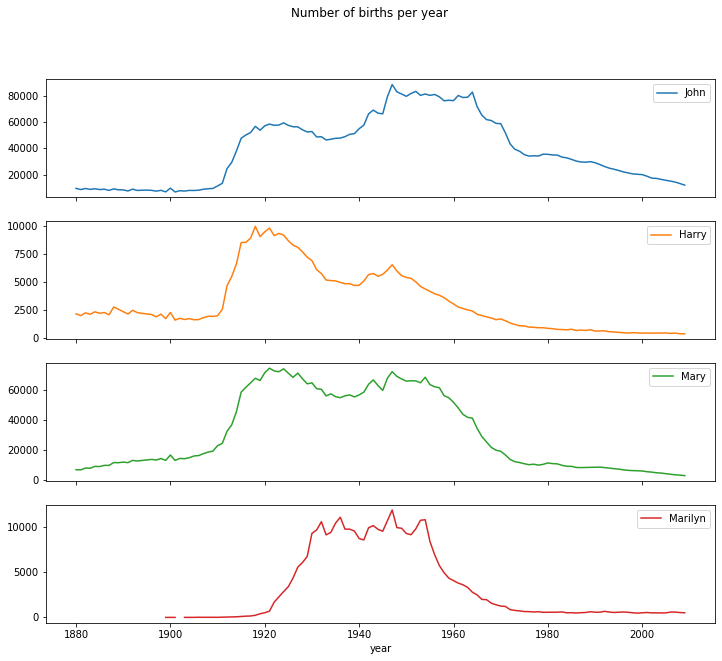

In [78]:
subset =  total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")


### Measuring the increase in naming diversity
- __The boy name year wise__

In [83]:
df = boys[boys.year == 1990]
df

name sex  births  year
year sex                                       
1990 M   1085034      Michael   M   65302  1990
         1085035  Christopher   M   52347  1990
         1085036      Matthew   M   44819  1990
         1085037       Joshua   M   43221  1990
         1085038       Daniel   M   33823  1990
...                       ...  ..     ...   ...
         1086031         Jory   M     112  1990
         1086032         Tate   M     112  1990
         1086029     Brittany   M     112  1990
         1086030      Eliezer   M     112  1990
         1086034        Denis   M     111  1990

[1000 rows x 4 columns]

### The “Last letter” Revolution

In [95]:
#Extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters    = names.name.map(get_last_letter)

last_letters.name = 'last_letter'
table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)
table.head()

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33381.0  34080.0  40399.0  41913.0  48089.0  49616.0  53883.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2000      2001      2002   
last_letter                             ...                                 
a            48942.0  59440.0  58631.0  ...   40864.0   39169.0   38857.0   
b                NaN      NaN      NaN  ...   50933.0   51006.0   49334.0   
c                NaN      NaN      NaN  ...   27027.0   27133.0   27265.0   
d             1027.0   1298.0   1374.0  ...   64355.0   60918.0   55933.0   
e            54353.0  66748.0  66662.0  ...  148954.0  145514.0  144794.0   

sex                                                                      \
year             2003      2004      2005      2006      2007      2008   
last_letter                                                               
a             37871.0   38710.0   36913.0   36248.0   34760.0   33046.0   
b             48123.0   45964.0   43216.0   42686.0   42258.0   40098.0   
c             27726.0   26803.0   26125.0   26682.0   26919.0   25402.0   
d             53465.0   51861.0   50782.0   51542.0   50770.0   48095.0   
e            144937.0  142270.0  141336.0  143258.0  144061.0  141405.0   

sex                    
year             2009  
last_letter            
a             31634.0  
b             39106.0  
c             24164.0  
d             46378.0  
e            136071.0  

[5 rows x 260 columns]

- __Let's select three representive years of history and print few years__
- __'reindexing' in Pandas can be used to change the index of rows and columns of a DataFram__

In [96]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable

sex                 F                  M          
year             1910      1960     1910      1960
last_letter                                       
a            108399.0  691278.0    977.0    5212.0
b                 NaN     694.0    411.0    3911.0
c                 5.0      49.0    482.0   15457.0
d              6751.0    3731.0  22113.0  262120.0
e            133601.0  435023.0  28665.0  178760.0
f                 NaN      20.0    152.0    9233.0
g                57.0     318.0    439.0   20232.0
h             20432.0   73242.0   8849.0   80834.0
i               605.0   80809.0    164.0    1300.0
j                 NaN       NaN      NaN       NaN
k                48.0     314.0   7104.0  105273.0
l             17124.0   68482.0  12628.0  223645.0
m               476.0   17415.0  11273.0   72131.0
n             31418.0  264218.0  27847.0  325186.0
o               663.0    4932.0   3314.0   27386.0
p                 7.0      47.0    616.0   12097.0
q                 NaN       NaN      NaN       NaN
r              5311.0   13679.0  12521.0   66188.0
s             15478.0   25810.0  25402.0  218965.0
t             10877.0   30731.0  14155.0  139959.0
u               271.0    1162.0     24.0     121.0
v                 NaN     122.0     22.0      77.0
w                 8.0      63.0   1228.0   16434.0
x                 6.0      74.0    770.0    3946.0
y             44002.0  308469.0  15021.0  343255.0
z               966.0    1330.0     33.0     393.0

In [97]:
# sfD
subtable.sum()


sex  year
F    1910     396505.0
     1960    2022012.0
M    1910     194210.0
     1960    2132115.0
dtype: float64

In [98]:
letter_prop = subtable / subtable.sum().astype(float)
letter_prop

sex                 F                   M          
year             1910      1960      1910      1960
last_letter                                        
a            0.273386  0.341876  0.005031  0.002445
b                 NaN  0.000343  0.002116  0.001834
c            0.000013  0.000024  0.002482  0.007250
d            0.017026  0.001845  0.113861  0.122939
e            0.336947  0.215144  0.147598  0.083842
f                 NaN  0.000010  0.000783  0.004330
g            0.000144  0.000157  0.002260  0.009489
h            0.051530  0.036222  0.045564  0.037913
i            0.001526  0.039965  0.000844  0.000610
j                 NaN       NaN       NaN       NaN
k            0.000121  0.000155  0.036579  0.049375
l            0.043187  0.033868  0.065022  0.104893
m            0.001200  0.008613  0.058045  0.033831
n            0.079237  0.130671  0.143386  0.152518
o            0.001672  0.002439  0.017064  0.012845
p            0.000018  0.000023  0.003172  0.005674
q                 NaN       NaN       NaN       NaN
r            0.013395  0.006765  0.064471  0.031043
s            0.039036  0.012765  0.130797  0.102698
t            0.027432  0.015198  0.072885  0.065643
u            0.000683  0.000575  0.000124  0.000057
v                 NaN  0.000060  0.000113  0.000036
w            0.000020  0.000031  0.006323  0.007708
x            0.000015  0.000037  0.003965  0.001851
y            0.110975  0.152555  0.077344  0.160993
z            0.002436  0.000658  0.000170  0.000184

<AxesSubplot:title={'center':'Female'}, xlabel='last_letter'>

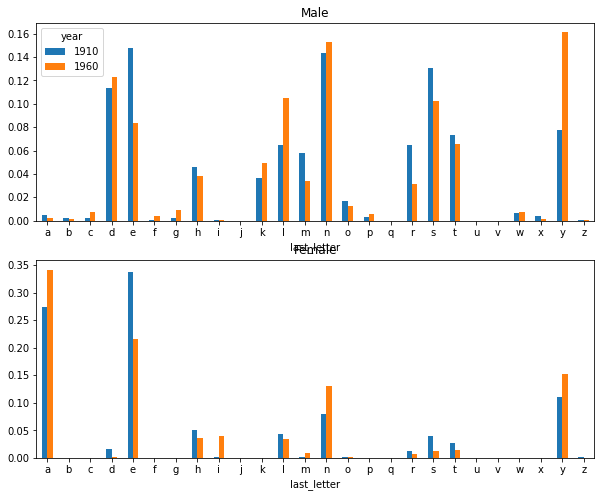

In [101]:
import matplotlib.pyplot as plt 

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

### Boy names that became girl names (and vice versa)

- __Here we will look at boy name that become girl name of vice varsa__

In [102]:
all_names = names.name.unique()
all_names

array(['Mary', 'Anna', 'Emma', ..., 'Zyran', 'Zyreion', 'Zyvion'],
      dtype=object)

In [105]:
mask        = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Boleslaw', 'Boleslaus', 'Lesly', 'Leslye',
       'Leslee', 'Wellesley', 'Lesli', 'Leslyn', 'Lesle', 'Lesleigh',
       'Leslea', 'Leslieann', 'Lesleyann', 'Lesleyanne', 'Leslianne',
       'Leslieanne', 'Lesliann', 'Leslei', 'Leslian', 'Lesliee',
       'Leslyann', 'Leslly'], dtype=object)

In [108]:
filtered = names[names.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Boleslaus        255
Boleslaw         277
Lesle            187
Leslea           349
Leslee          4842
Leslei            52
Lesleigh         441
Lesley         37737
Lesleyann         86
Lesleyanne        80
Lesli           5398
Leslian           27
Lesliann           6
Leslianne         10
Leslie        370224
Leslieann        465
Leslieanne        93
Lesliee            8
Leslly             5
Lesly          11910
Leslyann          16
Leslye          2267
Leslyn           166
Wellesley          6
Name: births, dtype: int64

- __Let's aggregate by sex and year__

In [111]:
 table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')
 table = table.div(table.sum(1), axis=0)
 table.tail()


sex,F,M
year,,
2005,0.973915,0.026085
2006,0.979148,0.020852
2007,0.978523,0.021477
2008,0.977456,0.022544
2009,0.971748,0.028252


- __Now let's plot a graph__

<AxesSubplot:xlabel='year'>

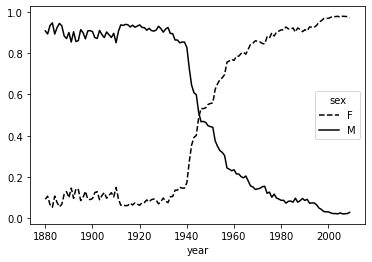

In [113]:
table.plot(style={'M': 'k-', 'F': 'k--'})

# [Summary]
